<a href="https://colab.research.google.com/github/npnayak/Credit-Card/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 (12 points)
Using the Framingham Heart Study dataset create a logistic regression model to predict whether a patient will develop heart desease in 10 years or not.

## Importing data

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)
sns.set(style="white")
df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Business-Analytics/master/data/AnalyticsEdge-Datasets/Framingham.csv')
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [84]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## Preprocessing

 Deleting columns with no predictive power/handling missing values

In [85]:
df["education"].fillna(df["education"].median(skipna=True), inplace=True)                
df["cigsPerDay"].fillna(df["cigsPerDay"].median(skipna=True), inplace=True)
df["BPMeds"].fillna(df["BPMeds"].median(skipna=True), inplace=True)
df["totChol"].fillna(df["totChol"].median(skipna=True), inplace=True)
df["BMI"].fillna(df["BMI"].median(skipna=True), inplace=True)
df["heartRate"].fillna(df["heartRate"].median(skipna=True), inplace=True)
df["glucose"].fillna(df["glucose"].median(skipna=True), inplace=True)

In [86]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [87]:
print(f'Duplicates in df: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in df: 0, (0.0%)



In [88]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1364
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

In [89]:
df.drop(['education','sysBP', 'diaBP', 'glucose'], axis=1, inplace=True)   


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4240 non-null   float64
 9   BMI              4240 non-null   float64
 10  heartRate        4240 non-null   float64
 11  TenYearCHD       4240 non-null   int64  
dtypes: float64(5), int64(7)
memory usage: 397.6 KB


Create feature matrix and target vector. Our target variable is TenYearCHD

In [91]:
X = df.drop('TenYearCHD', axis=1)
X.shape

(4240, 11)

In [92]:
y = df['TenYearCHD']
y.shape

(4240,)

Split the data randomly into train and test with a 70-30 split (use random_state=833)

In [93]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=833)

Instantiate and fit a logistic regression model

In [94]:
from sklearn.linear_model import LogisticRegression  # 1. choose model class
model = LogisticRegression(solver='liblinear')       # 2. instantiate model

In [95]:
model.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [96]:
y_model = model.predict(Xtest)

In [97]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,TenYearCHD,predicted
0,1821,0,66,0,0.0,0.0,0,1,0,275.0,34.36,70.0,1,0
1,4100,1,69,1,1.0,0.0,0,0,0,245.0,26.58,70.0,1,0
2,1342,1,57,1,20.0,0.0,0,0,0,250.0,29.38,80.0,0,0
3,3216,0,39,0,0.0,0.0,0,1,0,219.0,29.06,94.0,0,0
4,4150,0,62,0,0.0,0.0,0,0,0,207.0,22.91,58.0,0,0


Make predictions and find the overall accuracy, sensitivity, and specificity on your test set

In [98]:
# Your answer goes here
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8529874213836478

Our basic model is giving us an accuracy of 85%. What accuracy can you reach by trying gaussian naive bayes? Repeat the steps for GaussianNB

In [99]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [100]:
# Your answer goes here
print("Our model is", round(sum(ytest == y_model)/len(y_model),2), "accurate!")

Our model is 0.83 accurate!


In [101]:
sum(ytest == 1)/len(ytest)

0.15172955974842767

In [102]:
len(ytest)

1272

In [103]:
P = sum(ytest == 0)
P

1079

In [104]:
TP = sum((ytest == 0) & (y_model == 0))
TP

1029

In [105]:
TP/P

0.953660797034291

In [106]:
N = sum(ytest == 0)
N

1079

In [107]:
TN = sum((ytest == 1) & (y_model == 1))
TN

30

In [108]:
TN/N

0.027803521779425393

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2968
Model:                            GLM   Df Residuals:                     2956
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1150.7
Date:                Tue, 26 Apr 2022   Deviance:                       2301.4
Time:                        04:14:51   Pearson chi2:                 2.92e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.2833      0.666    -10.939      0.000      -8.588      -5.978
male                0.4322      0.117      3.702      0.000       0.203       0.661
age                 0.0738      0.007     10.571      0.000       0.060       0.087
currentSmoker      -0.0678      0.170     -0.399      0.690      -0.401       0.265
cigsPerDay          0.0237      0.007      3.558      0.000       0.011       0.037
BPMeds              0.3973      0.248      1.601      0.109      -0.089       0.884
prevalentStroke     1.2120      0.523      2.317      0.021       0.187       2.237
prevalentHyp        0.5782      0.119      4.843      0.000       0.344       0.812
diabetes            0.7870      0.252      3.128      0.002       0.294       1.280
totChol             0.0017      0.001      1.384      0.166      -0.001       0.004
BMI                 0.0098      0.013      0.746      0.455      -0.016       0.036
heartRate           0.0059      0.004      1.328      0.184      -0.003       0.015
===================================================================================
"""

Question 2 (8 points) 

Open ended - Do further data exploration and create new variables when possible (feature engineering)
Show your discovery process using plots and summaries. Your exploratory analysis will be graded as well as any work towards improving your model such as:

- How does the model performance change by adding new variables or potentially removing some of the less important ones?

- How does the model performance change by trying different classification models?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


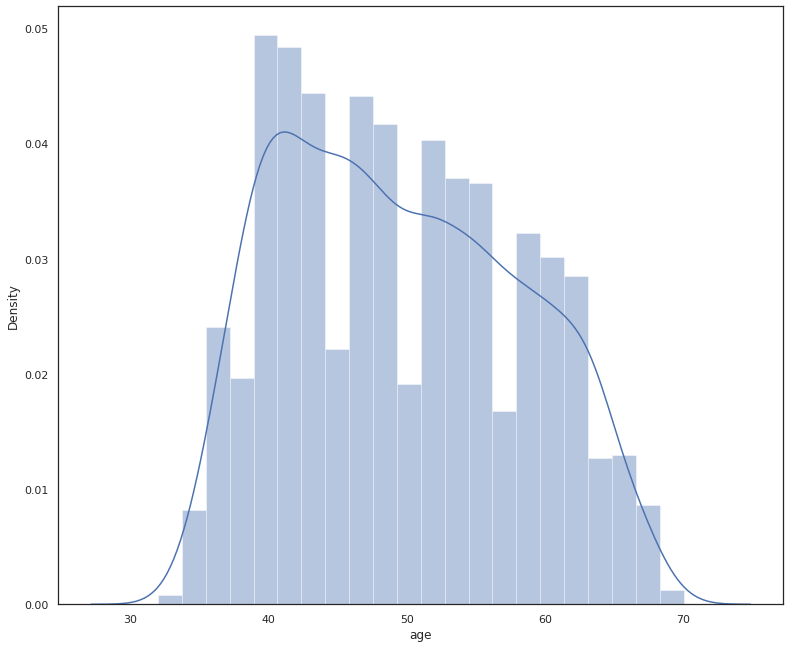

In [111]:
sns_plot = sns.distplot(df["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


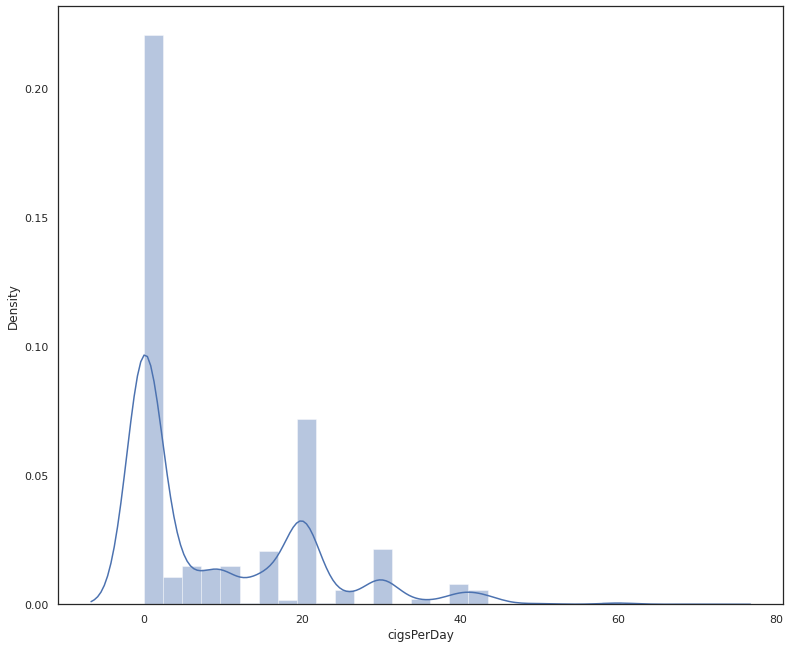

In [112]:
sns_plot = sns.distplot(df["cigsPerDay"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


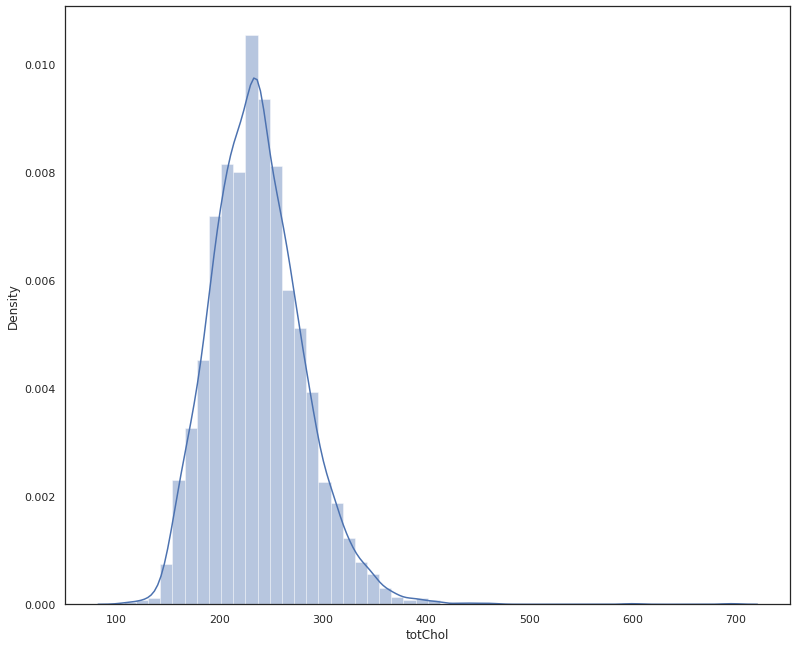

In [113]:
sns_plot = sns.distplot(df["totChol"])

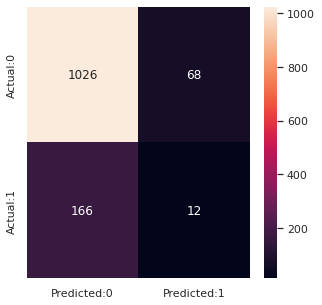

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn as sn
import matplotlib.pyplot as plt
# Evaluating trained models

conf_matrix=confusion_matrix(y_test,y_model)
conf_matrix1=pd.DataFrame(data=conf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sn.heatmap(conf_matrix1, annot=True,fmt='d')

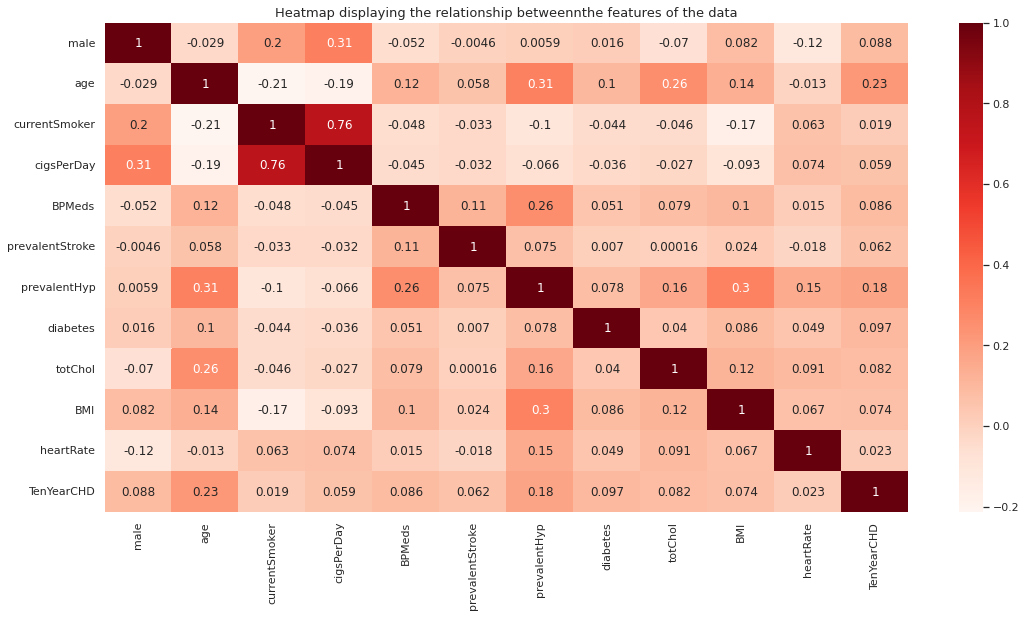

In [115]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

age, prevalentHyp, diabetes,and sysBP have stronger correlation with TenYearCHD. In order words, these are the variables that are more useful for predicting heart disease in 10 yrs.

In [116]:
df.groupby("TenYearCHD").mean()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate
TenYearCHD,,,,,,,,,,,
0,0.410734,48.762514,0.489989,8.648498,0.023081,0.003893,0.275862,0.019188,235.134316,25.670979,75.762514
1,0.532609,54.145963,0.517081,10.596273,0.063665,0.017081,0.504658,0.062112,245.229814,26.513882,76.527950


Oberservation from the chart:
It is easier to have heart disease in 10 yrs if you are older.
The people who have PrevalentStroke, prevalentHyp, or diabetes have higher chance to have heart disease in 10 yrs.
Education and BMI seem not crucial in the forecast model, compared to other vairables.

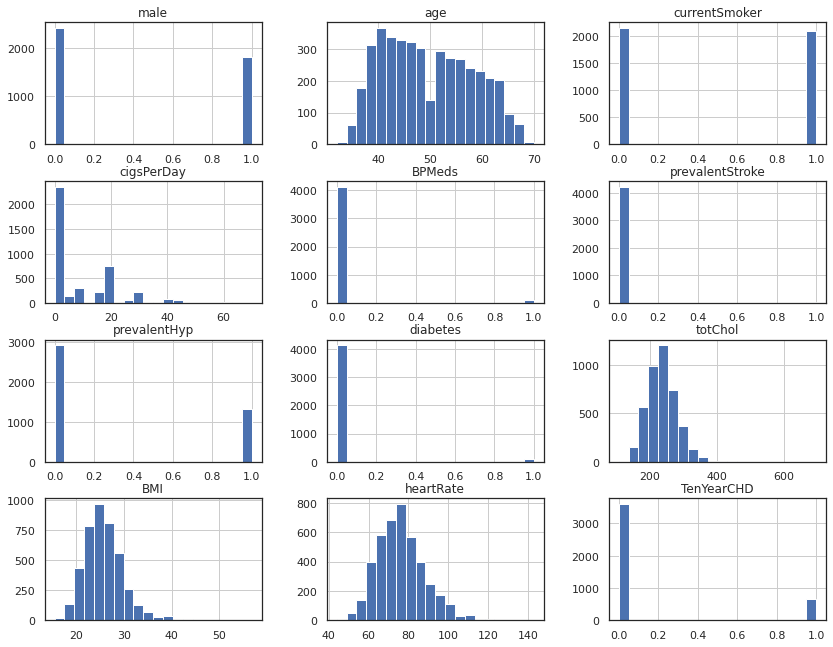

In [117]:
df.hist(figsize=(14,11),bins=20)
plt.show()

Only remain the cucial variables based on previous observation.potentially removing some of the less important ones

In [118]:
df_new=df.drop(['currentSmoker','cigsPerDay','totChol','BMI'], axis=1)

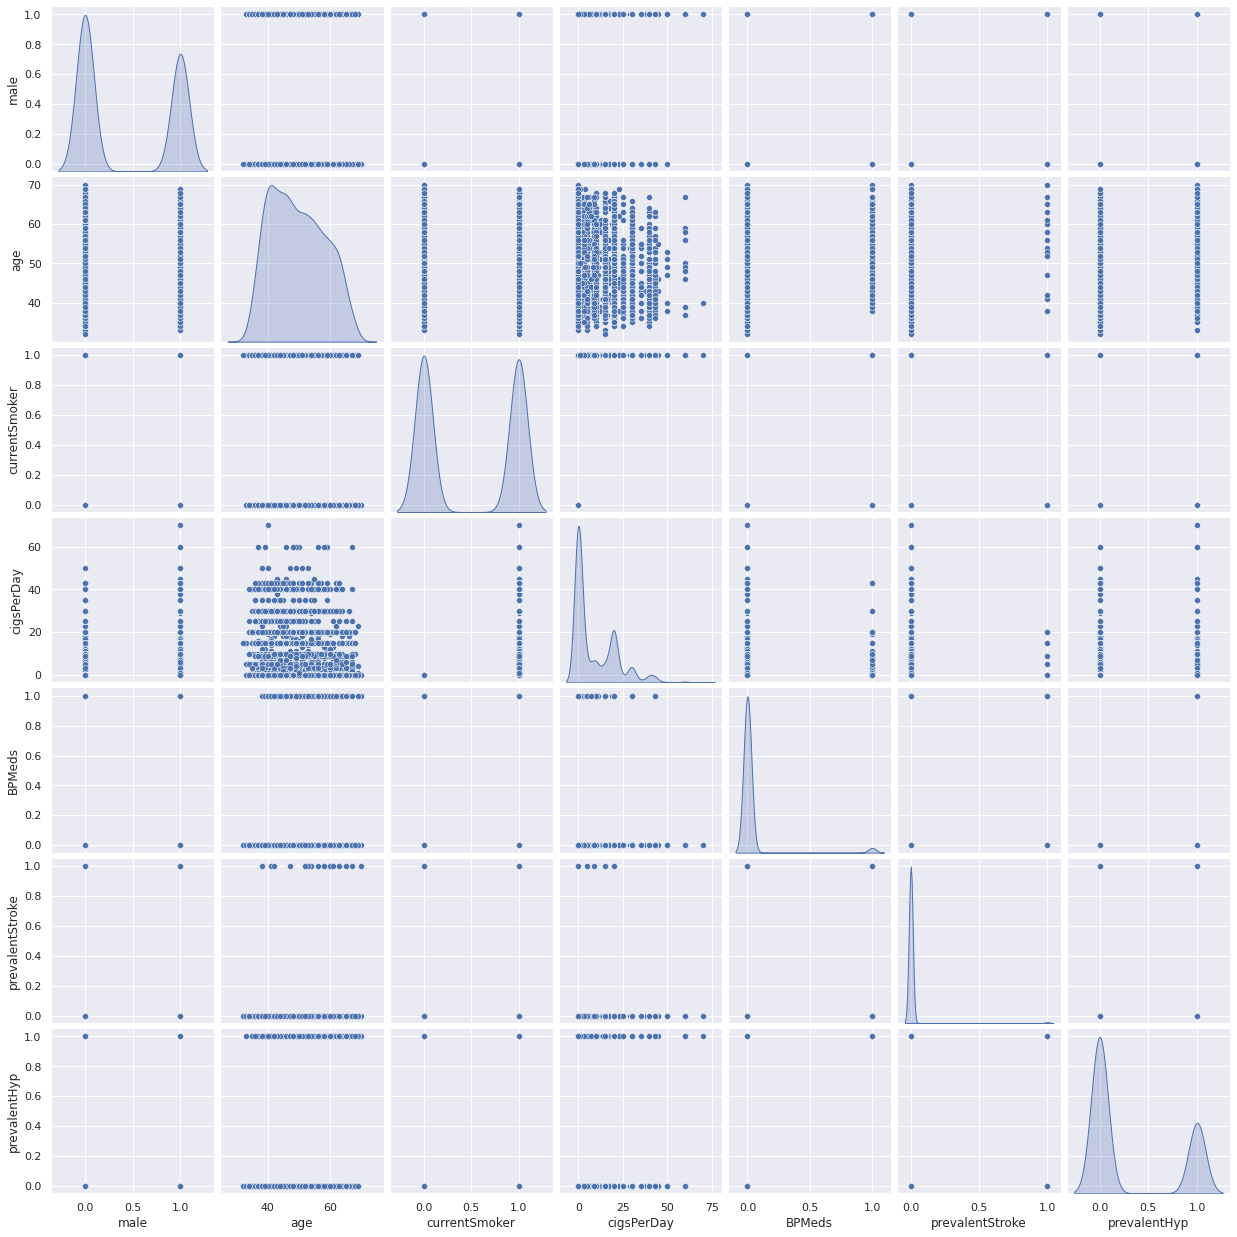

In [119]:
sns.set(rc={'figure.figsize':(13,11)})
df_new = df.iloc[:, 0:7]
sns.pairplot(df_new, diag_kind='kde') 

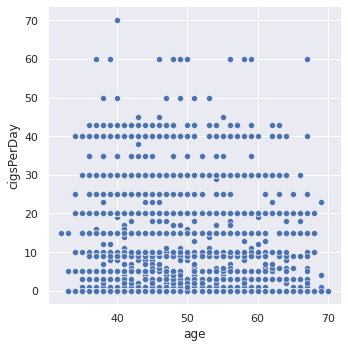

In [120]:
sns.relplot(x="age", y="cigsPerDay",data=df_new)

In [121]:
df_new.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp
0,1,39,0,0.0,0.0,0,0
1,0,46,0,0.0,0.0,0,0
2,1,48,1,20.0,0.0,0,0
3,0,61,1,30.0,0.0,0,1
4,0,46,1,23.0,0.0,0,0


In [126]:
X_Q2 = df_new.drop('cigsPerDay', axis=1)
X_Q2.shape

(4240, 6)

In [125]:
y_Q2 = df_new['cigsPerDay']
y_Q2.shape

(4240,)

In [127]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_Q2, y_Q2, test_size=0.3, random_state=833)
model_Q2 = LogisticRegression(solver='liblinear') 
model.fit(Xtrain, ytrain)
y_model_Q2 = model.predict(Xtest)
test_1 = Xtest.join(ytest).reset_index()
accuracy_score(ytest, y_model_Q2)

0.5007861635220126